In [3]:
!pip install tensorflow

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [5]:
image_size = 256
batch_size = 32
channels = 3

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Training",
    shuffle=True,
    image_size = (image_size,image_size),
    batch_size = batch_size

)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Testing",
    shuffle=True,
    image_size = (image_size,image_size),
    batch_size = batch_size

)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [7]:
class_names = train_ds.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [8]:
len(train_ds)

179

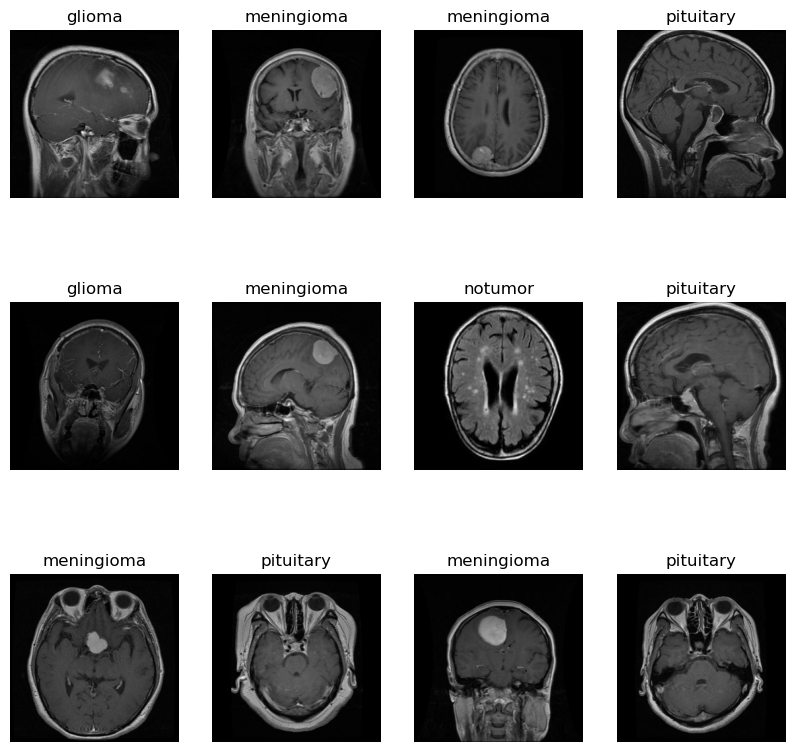

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train_ds.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [10]:
len(train_ds)

179

In [11]:
# Split the training dataset into training and validation sets
train_size = int(0.9 * len(train_ds))
train_img = train_ds.take(train_size)
val_ds = train_ds.skip(train_size)

In [12]:
print(len(train_img))
print(len(val_ds))

161
18


In [13]:
train_img = train_img.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_img = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [16]:
input_shape = (batch_size,image_size,image_size,channels)
n_classes = 4

In [17]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
])

model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [19]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [20]:
history = model.fit(
    train_img,
    epochs=20,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_img

)

Epoch 1/20


161/161 [==============================] - 371s 2s/step - loss: 0.8724 - accuracy: 0.6223 - val_loss: 0.7440 - val_accuracy: 0.7089
Epoch 2/20
161/161 [==============================] - 311s 2s/step - loss: 0.6117 - accuracy: 0.7620 - val_loss: 0.5192 - val_accuracy: 0.7911
Epoch 3/20
161/161 [==============================] - 372s 2s/step - loss: 0.5308 - accuracy: 0.7999 - val_loss: 0.5439 - val_accuracy: 0.7714
Epoch 4/20
161/161 [==============================] - 356s 2s/step - loss: 0.4665 - accuracy: 0.8218 - val_loss: 0.4426 - val_accuracy: 0.8357
Epoch 5/20
161/161 [==============================] - 309s 2s/step - loss: 0.4106 - accuracy: 0.8472 - val_loss: 0.3547 - val_accuracy: 0.8696
Epoch 6/20
161/161 [==============================] - 316s 2s/step - loss: 0.3704 - accuracy: 0.8562 - val_loss: 0.4159 - val_accuracy: 0.8589
Epoch 7/20
161/161 [==============================] - 321s 2s/step - loss: 0.3521 - accuracy: 0.8713 - val_loss: 0.3117 - val_accuracy: 0.90

In [21]:
scores = model.evaluate(test_ds)

41/41 [==============================] - 21s 331ms/step - loss: 0.2294 - accuracy: 0.9260


In [22]:
scores

[0.2293616682291031, 0.9260106682777405]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
ephocs = 20

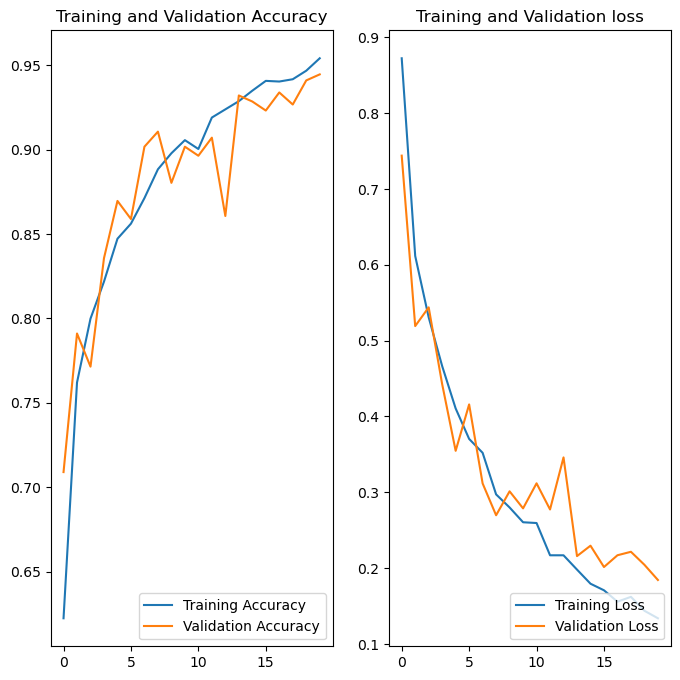

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(ephocs),acc,label = "Training Accuracy")
plt.plot(range(ephocs),val_acc,label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(ephocs),loss,label = "Training Loss")
plt.plot(range(ephocs),val_loss,label = "Validation Loss")
plt.legend(loc='lower right')
plt.title("Training and Validation loss")

plt.show()

First image to Predict
actual label: glioma
1/1 [==============================] - 0s 335ms/step
glioma


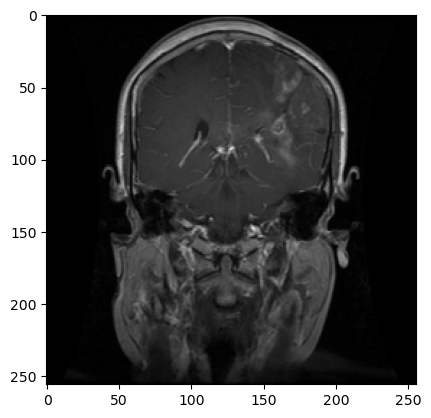

In [42]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print("First image to Predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[0])])

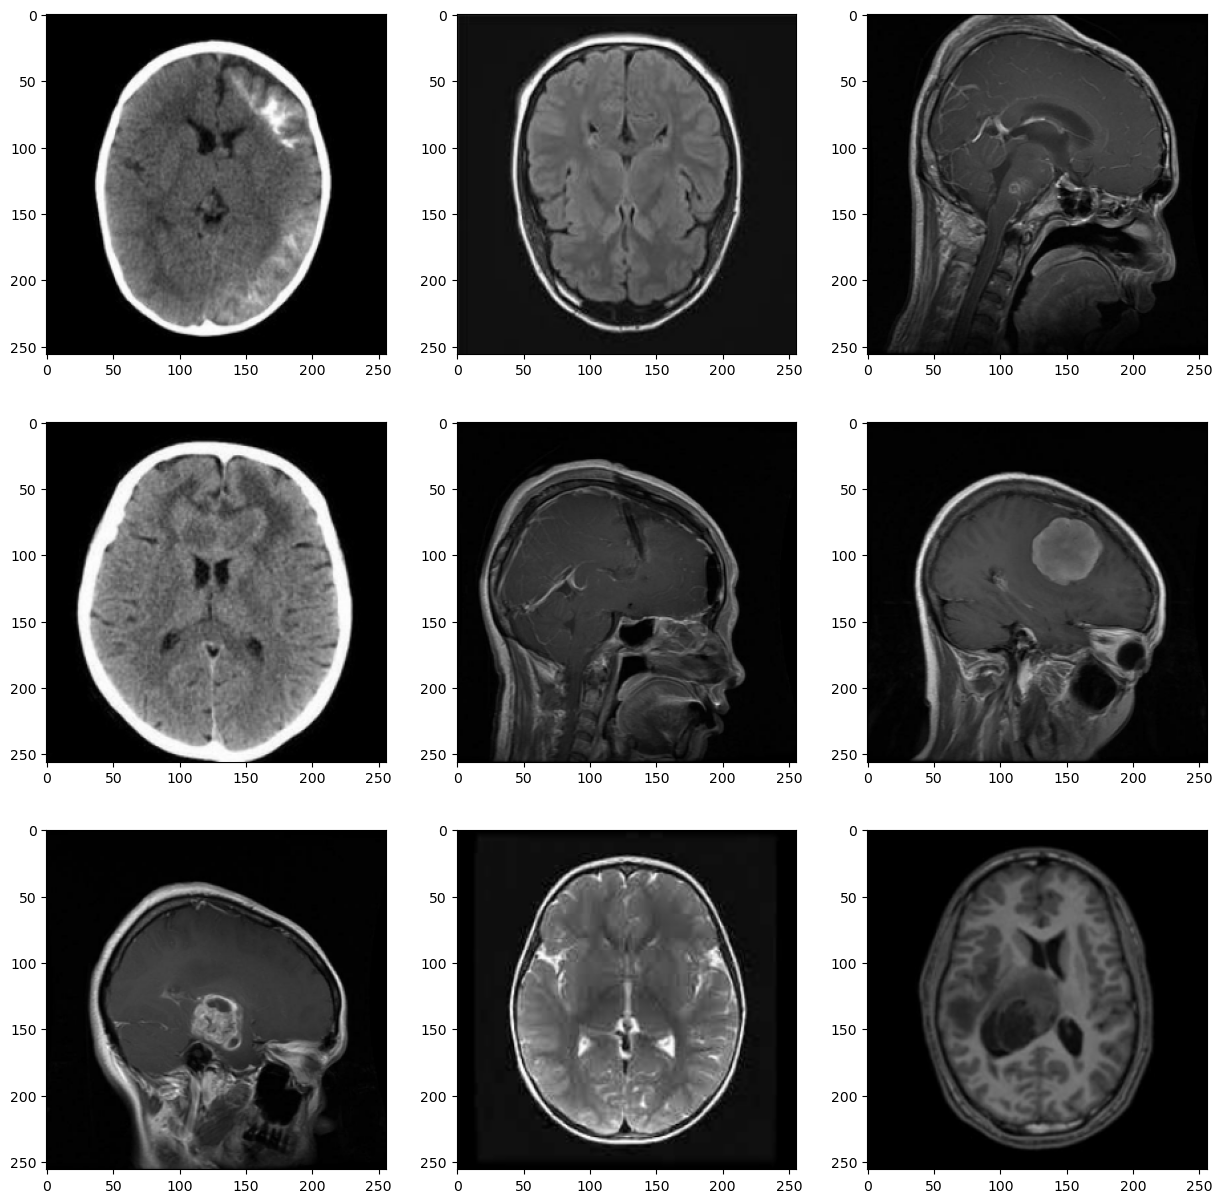

In [44]:
plt.figure(figsize=(15,15))
for image, labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        